### <center>Empirical Methods in Finance</center>
### <center>Homework 7</center>
#### <center>Authors - Ashutosh Ekade</center>

### ARCH & GARCH

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.simplefilter('once', category=Warning)

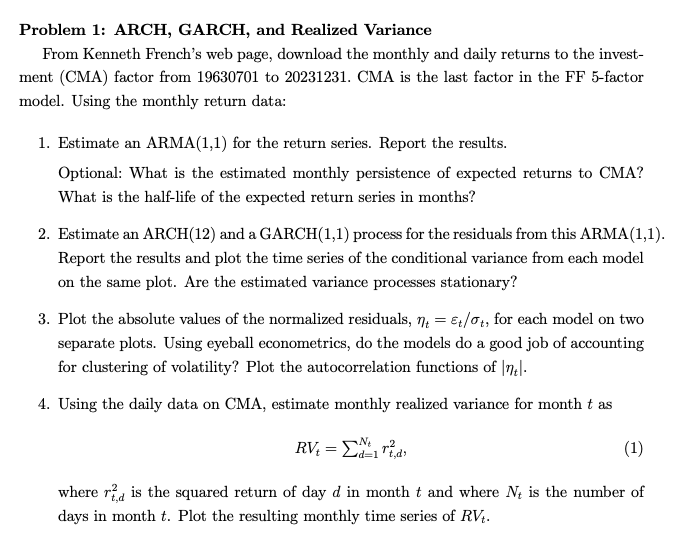

In [2]:
df = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows=3)

# Assuming the return data is in a column named 'returns'
df_new = df.iloc[:727,:]
cols = df_new.columns.to_list()
df_new.columns = ["date"] + cols[1:]
print(df_new.shape)
df_new["Mkt-RF"] = pd.to_numeric(df_new["Mkt-RF"])
df_new["SMB"] = pd.to_numeric(df_new["SMB"])
df_new["HML"] = pd.to_numeric(df_new["HML"])
df_new["CMA"] = pd.to_numeric(df_new["CMA"])
df_new["RF"] = pd.to_numeric(df_new["RF"])
# df_new["date"] = pd.to_datetime(df_new["date"], format="%Y%m")
# print(df_new.head())
# Fit ARMA(1,1) model
returns = df_new["CMA"]
model = sm.tsa.ARIMA(returns, order=(1,0,1))
results = model.fit()

# Print the summary of the model
print(results.summary())

(727, 7)
                               SARIMAX Results                                
Dep. Variable:                    CMA   No. Observations:                  727
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1552.745
Date:                Sun, 25 Feb 2024   AIC                           3113.490
Time:                        23:18:58   BIC                           3131.846
Sample:                             0   HQIC                          3120.573
                                - 727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2724      0.096      2.829      0.005       0.084       0.461
ar.L1          0.4109      0.150      2.742      0.006       0.117       0.705
ma.L1         -0.2790      0.159     -1.757

/var/folders/44/r2pt84y14r968g9_vxmvrlxh0000gn/T/ipykernel_43757/268522983.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Mkt-RF"] = pd.to_numeric(df_new["Mkt-RF"])


In [3]:
# Get the autoregressive coefficient (phi_1) from the ARMA model
phi_1 = results.arparams[0]

# Calculate the estimated monthly persistence
monthly_persistence = phi_1

# Calculate the half-life
half_life = np.log(2) / -np.log(np.abs(phi_1))

# Print the results
print("Estimated Monthly Persistence of Expected Returns to CMA:", monthly_persistence)
print("Half-life of the Expected Return Series in Months:", half_life)

Estimated Monthly Persistence of Expected Returns to CMA: 0.41093465234285886
Half-life of the Expected Return Series in Months: 0.7794116218920505


Iteration:      1,   Func. Count:     16,   Neg. LLF: 3084.956385057313
Iteration:      2,   Func. Count:     34,   Neg. LLF: 1561.6071034882602
Iteration:      3,   Func. Count:     51,   Neg. LLF: 4026.0594966770514
Iteration:      4,   Func. Count:     67,   Neg. LLF: 5274.121343695408
Iteration:      5,   Func. Count:     83,   Neg. LLF: 2088.09307888086
Iteration:      6,   Func. Count:     99,   Neg. LLF: 1799.859519857674
Iteration:      7,   Func. Count:    116,   Neg. LLF: 1498.0913116210359
Iteration:      8,   Func. Count:    132,   Neg. LLF: 1523.6403988014965
Iteration:      9,   Func. Count:    149,   Neg. LLF: 1499.304333477106
Iteration:     10,   Func. Count:    165,   Neg. LLF: 1490.9552678609589
Iteration:     11,   Func. Count:    181,   Neg. LLF: 1487.1518673586197
Iteration:     12,   Func. Count:    197,   Neg. LLF: 1494.4624174406058
Iteration:     13,   Func. Count:    213,   Neg. LLF: 1498.528879001374
Iteration:     14,   Func. Count:    230,   Neg. LLF: 1479

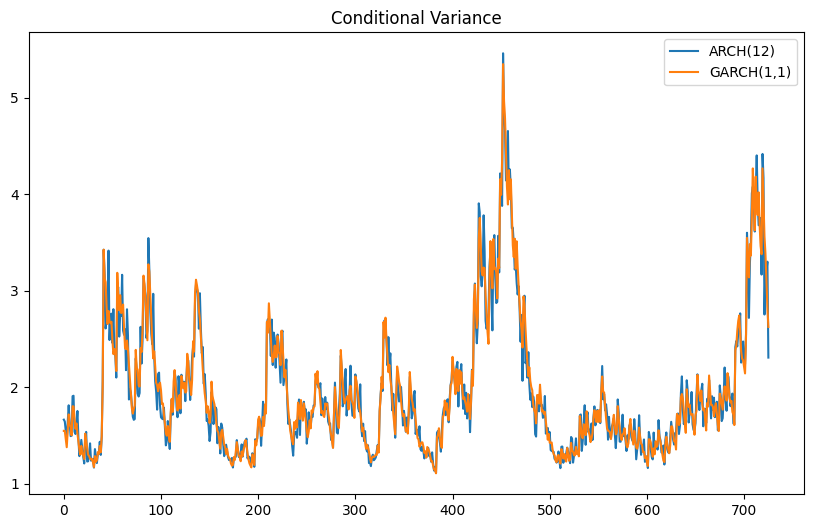

In [4]:
arma_results = results

# Extract residuals
residuals = arma_results.resid

# Drop NaN or infinite values
residuals = residuals.dropna()

# Estimate ARCH(12) model
arch_model_12 = arch_model(residuals, vol='ARCH', p=12)
arch_results_12 = arch_model_12.fit()

# Estimate GARCH(1,1) model
garch_model_11 = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_results_11 = garch_model_11.fit()

# Plot conditional variance
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ARCH(12) conditional variance
ax.plot(arch_results_12.conditional_volatility, label='ARCH(12)')

# Plot GARCH(1,1) conditional variance
ax.plot(garch_results_11.conditional_volatility, label='GARCH(1,1)')

ax.set_title('Conditional Variance')
ax.legend()
plt.show()

Yes the variance process appears to be mostly stationary.

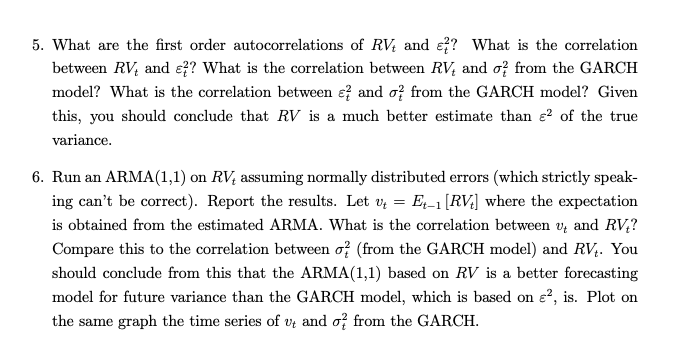

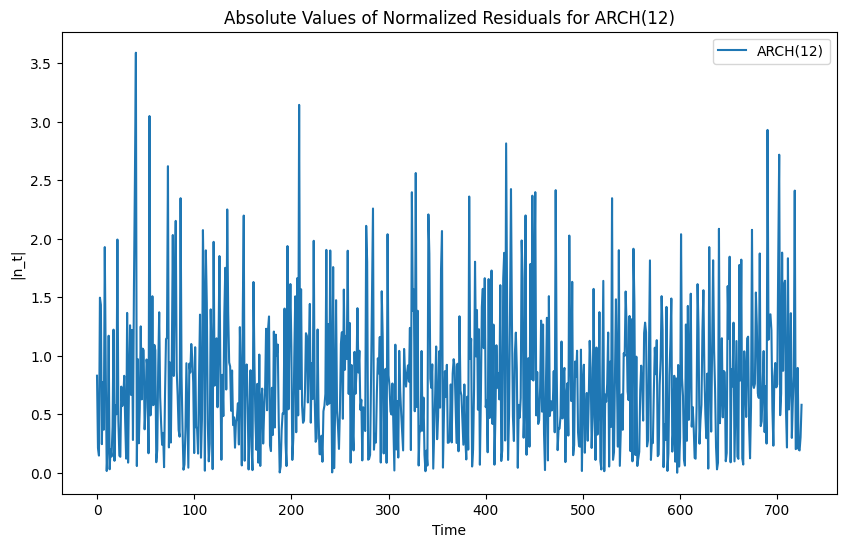

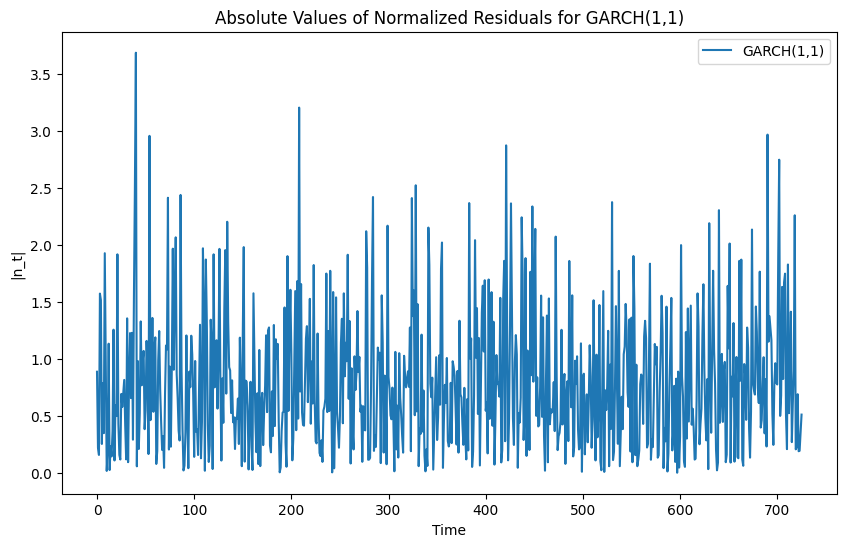

In [5]:
# Calculate normalized residuals
normalized_residuals_arch = arch_results_12.resid / arch_results_12.conditional_volatility
normalized_residuals_garch = garch_results_11.resid / garch_results_11.conditional_volatility

# Plot absolute values of normalized residuals for ARCH(12)
plt.figure(figsize=(10, 6))
plt.plot(np.abs(normalized_residuals_arch), label='ARCH(12)')
plt.title('Absolute Values of Normalized Residuals for ARCH(12)')
plt.xlabel('Time')
plt.ylabel('|n_t|')
plt.legend()
plt.show()

# Plot absolute values of normalized residuals for GARCH(1,1)
plt.figure(figsize=(10, 6))
plt.plot(np.abs(normalized_residuals_garch), label='GARCH(1,1)')
plt.title('Absolute Values of Normalized Residuals for GARCH(1,1)')
plt.xlabel('Time')
plt.ylabel('|n_t|')
plt.legend()
plt.show()

There are periods when the residuals explode which suggests that the model might not be able to explain all the variance.

<Figure size 1000x600 with 0 Axes>

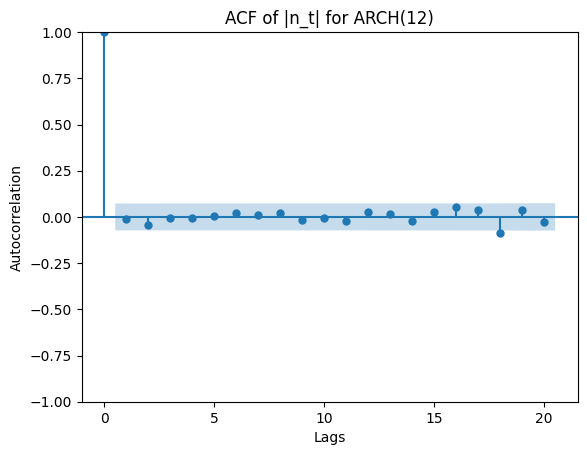

<Figure size 1000x600 with 0 Axes>

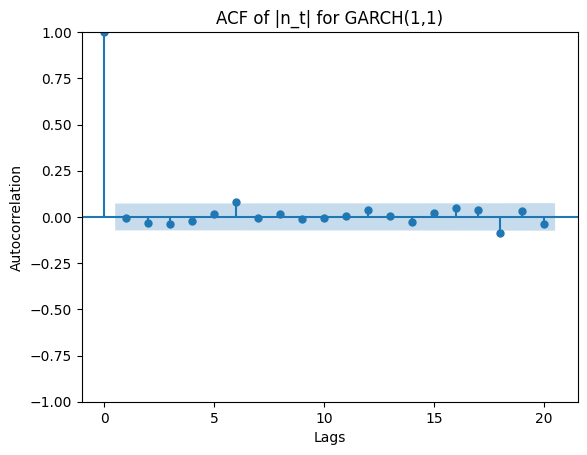

In [6]:
# Calculate the modulus of normalized residuals
modulus_normalized_residuals_arch = np.abs(normalized_residuals_arch)
modulus_normalized_residuals_garch = np.abs(normalized_residuals_garch)

# Plot autocorrelation functions of |n_t| for ARCH(12)
plt.figure(figsize=(10, 6))
plot_acf(modulus_normalized_residuals_arch, lags=20, title='ACF of |n_t| for ARCH(12)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot autocorrelation functions of |n_t| for GARCH(1,1)
plt.figure(figsize=(10, 6))
plot_acf(modulus_normalized_residuals_garch, lags=20, title='ACF of |n_t| for GARCH(1,1)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

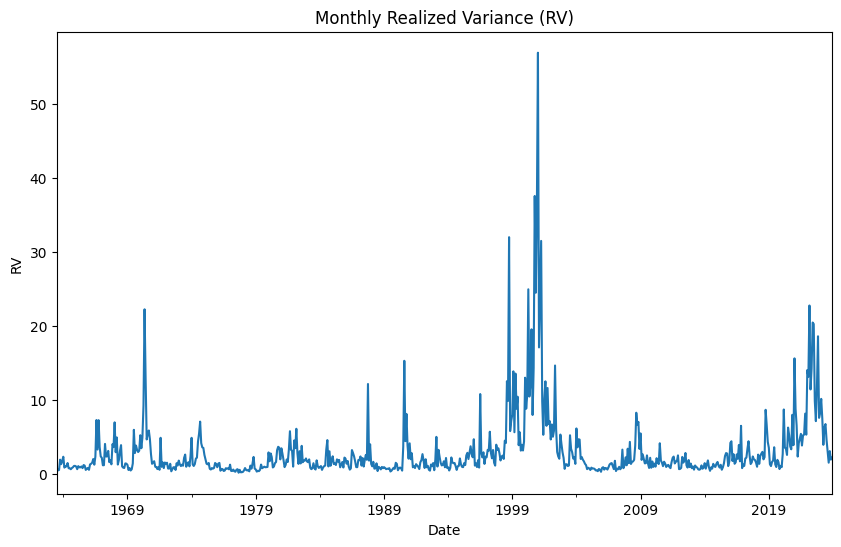

In [7]:
df = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv', skiprows=3)
cols = df.columns.to_list()
df.columns = ["date"] + cols[1:]
# Convert the date column to datetime type
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d")
# Set the date column as the index
df.set_index('date', inplace=True)

# Calculate squared returns
df['squared_returns'] = df['CMA'] ** 2

# Resample the squared returns to monthly frequency and sum them
monthly_rv = df['squared_returns'].resample('M').sum()

# Plot the resulting monthly time series of RV
plt.figure(figsize=(10, 6))
monthly_rv.plot()
plt.title('Monthly Realized Variance (RV)')
plt.xlabel('Date')
plt.ylabel('RV')
plt.show()

In [8]:
# Calculate squared normalized residuals
squared_garch_residuals = garch_results_11.resid ** 2
squared_garch_cond_var = garch_results_11.conditional_volatility ** 2

# Calculate correlation between RV_t and squared normalized residuals
correlation_rv_residuals = monthly_rv.corr(squared_garch_residuals)

# Calculate correlation between RV_t and the square of sigma_t from the GARCH model
correlation_rv_var = monthly_rv.corr(squared_garch_cond_var)

correlation_resid_var = squared_garch_residuals.corr(squared_garch_cond_var)
# Print the results
print("First order autocorrelation of RV_t:", monthly_rv.autocorr())
print("First order autocorrelation of squared residuals:", squared_garch_residuals.autocorr())
print("Correlation between RV_t and the square of e_t:", correlation_rv_residuals)
print("Correlation between RV_t and the square of sigma_t from the GARCH model:", correlation_rv_var)
print("Correlation between the square of e_t and the square of sigma_t from the GARCH model:", correlation_resid_var)

First order autocorrelation of RV_t: 0.7053819399882244
First order autocorrelation of squared residuals: 0.21915577078775572
Correlation between RV_t and the square of e_t: nan
Correlation between RV_t and the square of sigma_t from the GARCH model: nan
Correlation between the square of e_t and the square of sigma_t from the GARCH model: 0.37570421172470464


Yes we can conclude that R_t is a much better estimate than e_t^2.

In [9]:
# Fit ARMA(1,1) model on RV_t
arma_model_rv = sm.tsa.ARIMA(monthly_rv, order=(1, 0, 1))
arma_results_rv = arma_model_rv.fit()

# Get the residuals from the ARMA model
residuals_rv = arma_results_rv.resid

# Calculate v_t = E_{t-1}[RV_t] using the fitted ARMA model
v_t = arma_results_rv.predict(start=1)  # Exclude the first observation to align with E_{t-1}

# Align v_t and RV by removing the first observation from RV
RV_aligned = monthly_rv[1:]

# Compute the correlation between v_t and RV_t
correlation_v_rv = np.corrcoef(v_t, RV_aligned)[0, 1]

# Report the results
print("Results of ARMA(1,1) model on RV_t:")
print(arma_results_rv.summary())
print("\nCorrelation between v_t and RV_t:", correlation_v_rv)

Results of ARMA(1,1) model on RV_t:
                               SARIMAX Results                                
Dep. Variable:        squared_returns   No. Observations:                  726
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1835.100
Date:                Sun, 25 Feb 2024   AIC                           3678.200
Time:                        23:18:59   BIC                           3696.550
Sample:                    07-31-1963   HQIC                          3685.282
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9660      1.256      2.361      0.018       0.504       5.429
ar.L1          0.9261      0.009    108.459      0.000       0.909       0.943
ma.L1         -0

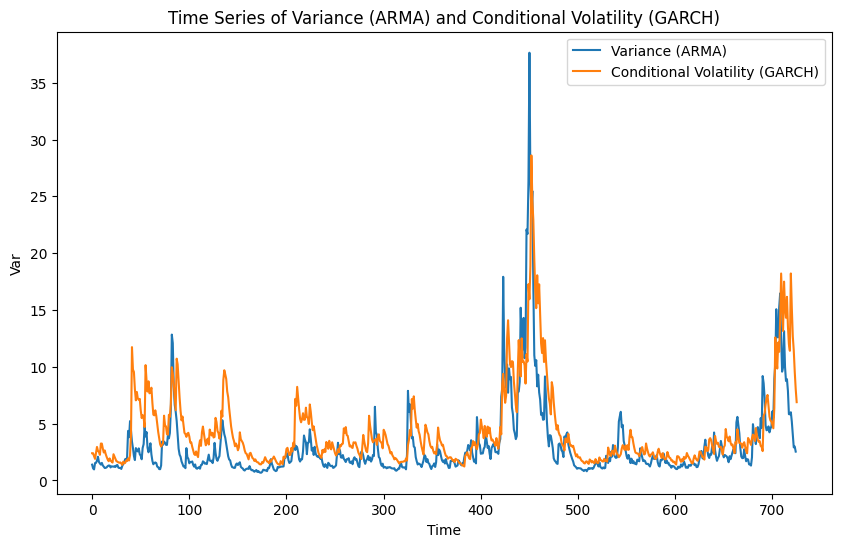

In [10]:
vt = v_t.values
sq_cond_gar_var = squared_garch_cond_var.values
# Plot v_t and sigma_t^2 on the same graph
plt.figure(figsize=(10, 6))
plt.plot(vt, label='Variance (ARMA)')
plt.plot(sq_cond_gar_var, label='Conditional Volatility (GARCH)')
plt.title('Time Series of Variance (ARMA) and Conditional Volatility (GARCH)')
plt.xlabel('Time')
plt.ylabel('Var')
plt.legend()
plt.show()